In [ ]:
pip install yfinance # for getting ohlcv data

     |████████████████████████████████| 6.3 MB 534 kB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=22115ba3e47cd443eb5cb7378530645cd5f5c2df2e3b9b737f9f7bf033b22460
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install mplfinance # for plotting renko charts 

     |████████████████████████████████| 62 kB 672 kB/s 


In [ ]:
import datetime as dt
import yfinance as yf
import pandas as pd
import mplfinance as fplt

In [ ]:
start_date = dt.datetime.today()- dt.timedelta(1825) # getting data for 1825(around 5 years of data) days --> timedelta is difference in time
end_date = dt.datetime.today()
ticker_name = "TCS.NS"
ohlcv = yf.download(ticker_name, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
ohlcv

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-08-01,1316.000000,1362.500000,1316.000000,1354.125000,1228.742798,3961704
2016-08-02,1351.449951,1357.849976,1344.900024,1349.599976,1224.636963,2578162
2016-08-03,1343.000000,1349.500000,1324.525024,1328.150024,1205.172729,2294702
2016-08-04,1335.000000,1341.474976,1318.125000,1326.000000,1203.221802,1415416
2016-08-05,1336.949951,1342.150024,1316.000000,1324.550049,1201.906250,1868484
...,...,...,...,...,...,...
2021-07-26,3200.000000,3224.250000,3190.850098,3197.550049,3197.550049,1259611
2021-07-27,3200.000000,3210.000000,3161.149902,3182.949951,3182.949951,1121367
2021-07-28,3188.000000,3204.449951,3132.399902,3197.800049,3197.800049,1660654


In [ ]:
# Function to calculate average true range
def ATR(DF, n):
  df = DF.copy() # making copy of the original dataframe
  df['H-L'] = abs(df['High'] - df['Low']) 
  df['H-PC'] = abs(df['High'] - df['Adj Close'].shift(1))# high -previous close
  df['L-PC'] = abs(df['Low'] - df['Adj Close'].shift(1)) #low - previous close
  df['TR'] = df[['H-L','H-PC','L-PC']].max(axis =1, skipna = False) # True range
  df['ATR'] = df['TR'].rolling(n).mean() # average –true range
  df = df.drop(['H-L','H-PC','L-PC'], axis =1) # dropping the unneccesary columns
  df.dropna(inplace = True) # droping null items
  return df

In [ ]:
ATR(ohlcv,50)

,Open,High,Low,Close,Adj Close,Volume,TR,ATR
Date,,,,,,,,
2016-10-10,1184.949951,1193.449951,1177.525024,1190.150024,1079.950806,1202142,119.170532,126.494033
2016-10-13,1181.650024,1184.949951,1160.449951,1164.449951,1056.630371,5173334,104.999146,125.687385
2016-10-14,1157.500000,1193.500000,1145.500000,1183.099976,1073.553223,7741214,136.869629,125.843042
2016-10-17,1184.449951,1187.900024,1172.199951,1181.224976,1071.852051,2728346,114.346802,124.647690
2016-10-18,1188.000000,1207.849976,1177.400024,1200.099976,1088.979004,2128632,135.997925,124.785505
...,...,...,...,...,...,...,...,...
2021-07-19,3180.000000,3199.800049,3176.000000,3184.600098,3184.600098,1597058,23.800049,52.690537
2021-07-20,3184.600098,3215.000000,3156.149902,3205.800049,3205.800049,1811945,58.850098,52.800757
2021-07-22,3190.000000,3224.949951,3190.000000,3216.350098,3216.350098,2859334,34.949951,52.760752


In [ ]:
bricks = round(ATR(ohlcv,50)["ATR"][-1],0) # Using default 50 days rolling average.

In [ ]:
bricks

52.0

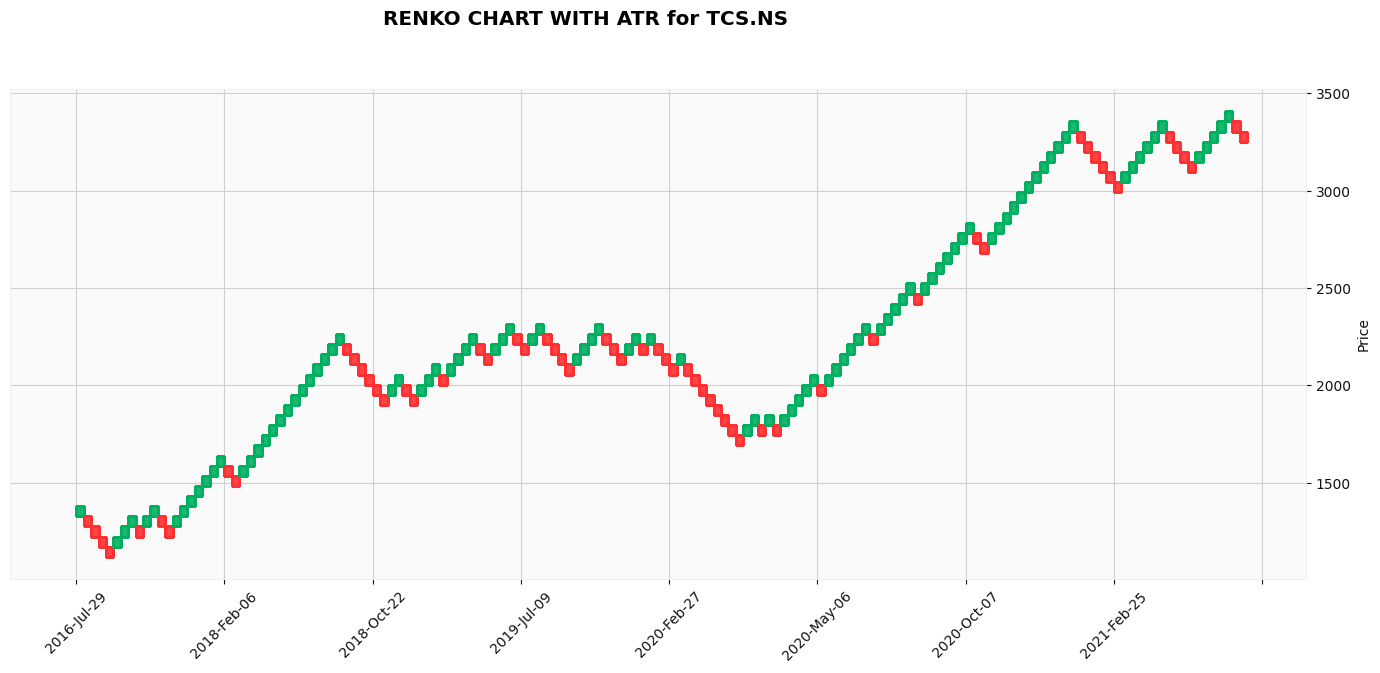

In [ ]:
fplt.plot(ohlcv,type='renko',renko_params=dict(brick_size=bricks, atr_length=14),
          style='yahoo',figsize =(18,7),
          title = "RENKO CHART WITH ATR for {0}".format(ticker_name))